# Upper Confidence Bound (UCB)

## Importing the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [39]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [44]:
import math
N = 1000 #used to be 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d #initialize a list with 10 zeros 
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range (0, d):
        if (numbers_of_selections[i] > 0): #means that the ad was selected at least once
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else: #ad has not been selected yet
            upper_bound = 1e400 #this is the value of a very very very big number in the python enviroment
        if upper_bound > max_upper_bound: #make sure we have indeed the upperbound larger than the max upper bound
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] +=  1
    #very important for reinforcement learning is the reward
    reward = dataset.values[n,ad] #n is the ciunter of the for loop. 
    sums_of_rewards[ad] = sums_of_rewards[ad] +reward
    total_reward = total_reward + reward
    
        

## Visualising the results


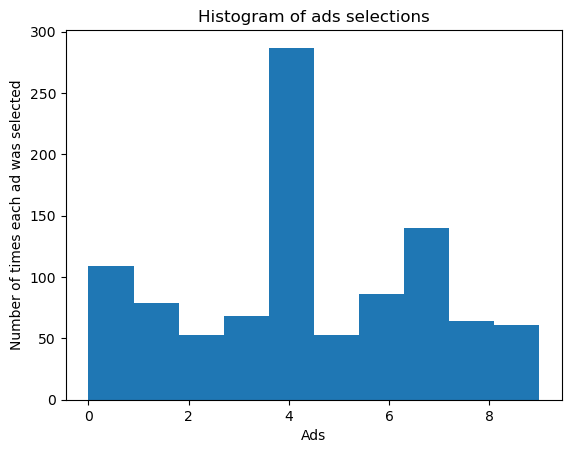

In [43]:
plt.hist(ads_selected)#ploting
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()